# **Loading the Dataset**


In [1]:
import pandas as pd

In [2]:
from google.colab import files

# Uploading datasets
uploaded = files.upload()

Saving Football-Scenarios-DFE-832307.csv to Football-Scenarios-DFE-832307.csv


In [3]:
# Print file names to confirm the upload
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

Uploaded file: Football-Scenarios-DFE-832307.csv


# **Loading the CSV into a Pandas DataFrame**

In [4]:
import pandas as pd

# Get the filename (assuming only one file is uploaded)
file_name = list(uploaded.keys())[0]

# Load the CSV file into a pandas DataFrame
football_data = pd.read_csv(file_name)

# Show the first few rows to check the data
football_data.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,option1,option2,option3,option4,option5
0,831005673,False,finalized,5,11/20/15 20:20,kick a field goal,0.8092,It is first down and 10. The ball is on your o...,NaN,punt,kick a field goal,run,pass,kneel down
1,831005674,False,finalized,5,11/18/15 21:59,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
2,831005675,False,finalized,5,11/20/15 22:43,kick a field goal,0.6211,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
3,831005676,False,finalized,5,11/19/15 7:41,kick a field goal,0.8073,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
4,831005677,False,finalized,5,11/21/15 8:01,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down


# **Cleaning the Dataset**

In [5]:
# Checking the structure and data types of the DataFrame
football_data.info()

# Droping unnecessary columns
football_data_clean = football_data.drop(columns=['_unit_id', '_golden', '_unit_state', 'antecedent_gold'])

# Converting date column to the correct format
football_data_clean['_last_judgment_at'] = pd.to_datetime(football_data_clean['_last_judgment_at'], errors='coerce')

# Checking for missing values
missing_values = football_data_clean.isnull().sum()
print("Missing values in each column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730 entries, 0 to 3729
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               3730 non-null   int64  
 1   _golden                3730 non-null   bool   
 2   _unit_state            3730 non-null   object 
 3   _trusted_judgments     3730 non-null   int64  
 4   _last_judgment_at      3706 non-null   object 
 5   antecedent             3730 non-null   object 
 6   antecedent:confidence  3730 non-null   float64
 7   orig_antecedent        3730 non-null   object 
 8   antecedent_gold        24 non-null     object 
 9   option1                3730 non-null   object 
 10  option2                3730 non-null   object 
 11  option3                3730 non-null   object 
 12  option4                3730 non-null   object 
 13  option5                3730 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usag

<ipython-input-5-48ebfe99bde4>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  football_data_clean['_last_judgment_at'] = pd.to_datetime(football_data_clean['_last_judgment_at'], errors='coerce')


In [6]:
# Drop rows where '_last_judgment_at' is missing
football_data_clean = football_data_clean.dropna(subset=['_last_judgment_at'])

# Verify no missing values remain
print(football_data_clean.isnull().sum())


_trusted_judgments       0
_last_judgment_at        0
antecedent               0
antecedent:confidence    0
orig_antecedent          0
option1                  0
option2                  0
option3                  0
option4                  0
option5                  0
dtype: int64


In [7]:
football_data_clean.head()

,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,option1,option2,option3,option4,option5
0,5,2015-11-20 20:20:00,kick a field goal,0.8092,It is first down and 10. The ball is on your o...,punt,kick a field goal,run,pass,kneel down
1,5,2015-11-18 21:59:00,kick a field goal,1.0000,It is second down and inches. The ball is on y...,punt,kick a field goal,run,pass,kneel down
2,5,2015-11-20 22:43:00,kick a field goal,0.6211,It is second down and inches. The ball is on y...,punt,kick a field goal,run,pass,kneel down
3,5,2015-11-19 07:41:00,kick a field goal,0.8073,It is second down and inches. The ball is on y...,punt,kick a field goal,run,pass,kneel down
4,5,2015-11-21 08:01:00,kick a field goal,1.0000,It is second down and inches. The ball is on y...,punt,kick a field goal,run,pass,kneel down


# **Analyzing the Dataset**

In [8]:
# Get descriptive statistics for the numerical columns
football_data_clean.describe()


,_trusted_judgments,_last_judgment_at,antecedent:confidence
count,3706.0,3706,3706.000000
mean,5.0,2015-11-20 09:13:37.026443520,0.759625
min,5.0,2015-11-18 20:40:00,0.210700
25%,5.0,2015-11-19 10:22:00,0.603325
50%,5.0,2015-11-20 16:03:00,0.798700
75%,5.0,2015-11-21 02:56:00,1.000000
max,5.0,2015-11-21 21:57:00,1.000000
std,0.0,NaN,0.190261


In [9]:
# Get the number of unique values in each categorical column
for col in ['antecedent', 'orig_antecedent', 'option1', 'option2', 'option3', 'option4', 'option5']:
    print(f"{col} has {football_data_clean[col].nunique()} unique values")


antecedent has 6 unique values
orig_antecedent has 3634 unique values
option1 has 1 unique values
option2 has 1 unique values
option3 has 1 unique values
option4 has 1 unique values
option5 has 1 unique values


In [10]:
# Value counts for the 'antecedent' column
football_data_clean['antecedent'].value_counts().head(10)


,count
antecedent,
pass,1332
run,1144
kick a field goal,607
punt,408
Don't know / it depends,130
kneel down,85


# **Analyzing and Visualising Confidence Levels by Antecedent**

In [11]:
# Grouping by 'antecedent' to find the average confidence for each type of antecedent
confidence_by_antecedent = football_data_clean.groupby('antecedent')['antecedent:confidence'].mean().reset_index()

# Displaying the result
print(confidence_by_antecedent)


                antecedent  antecedent:confidence
0  Don't know / it depends               0.673384
1        kick a field goal               0.756401
2               kneel down               0.626252
3                     pass               0.767198
4                     punt               0.767509
5                      run               0.769416


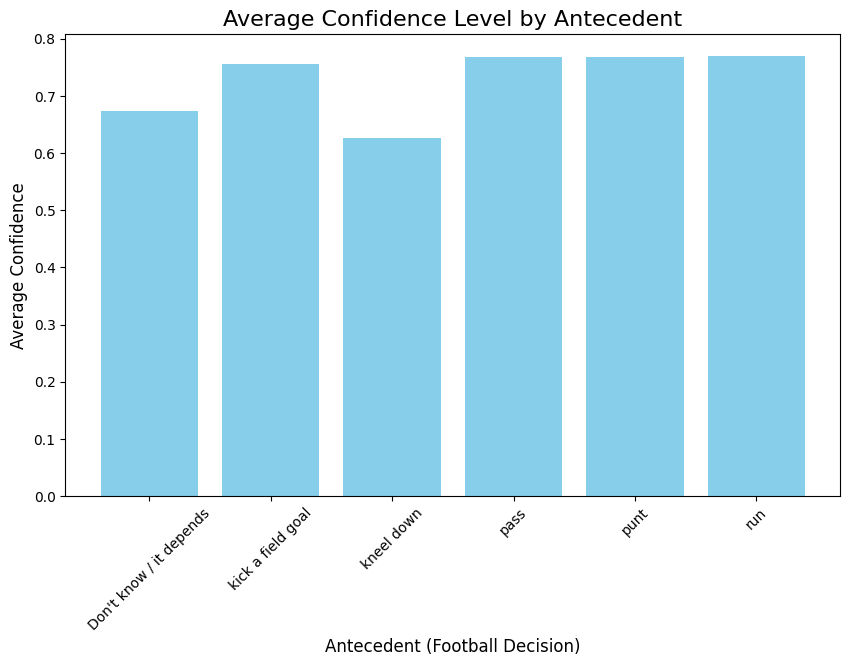

In [12]:
# Importing the necessary library
import matplotlib.pyplot as plt

# Creating a bar plot for confidence by antecedent
plt.figure(figsize=(10, 6))
plt.bar(confidence_by_antecedent['antecedent'], confidence_by_antecedent['antecedent:confidence'], color='skyblue')

# Adding title and labels
plt.title('Average Confidence Level by Antecedent', fontsize=16)
plt.xlabel('Antecedent (Football Decision)', fontsize=12)
plt.ylabel('Average Confidence', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()


# **Counting Judgments Over Time and Then Visualising it**

In [13]:
# Ensure the '_last_judgment_at' column is in datetime format
football_data_clean['_last_judgment_at'] = pd.to_datetime(football_data_clean['_last_judgment_at'], errors='coerce')


In [14]:
# Grouping by date to count the number of judgments on each day
judgments_over_time = football_data_clean.groupby(football_data_clean['_last_judgment_at'].dt.date).size().reset_index(name='count')

# Display the result
print(judgments_over_time)


  _last_judgment_at  count
0        2015-11-18    429
1        2015-11-19    971
2        2015-11-20   1172
3        2015-11-21   1134


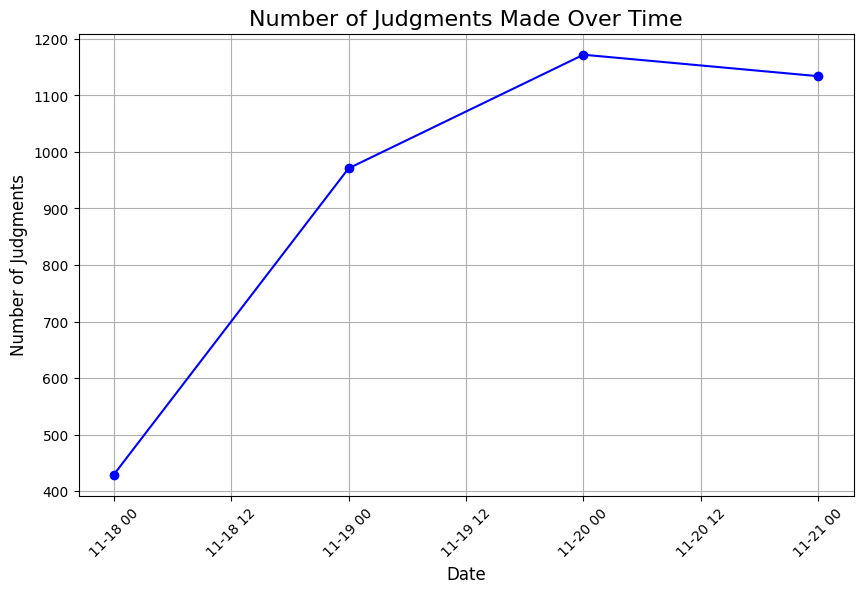

In [15]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a line plot for judgments over time
plt.figure(figsize=(10, 6))
plt.plot(judgments_over_time['_last_judgment_at'], judgments_over_time['count'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Number of Judgments Made Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Judgments', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add a grid to the plot for better visual clarity
plt.show()


# **Analyzing and Visualising Judgments by Time of Day**

In [16]:
# Creating a 'time_of_day' column based on the hour of the '_last_judgment_at' timestamp
football_data_clean['time_of_day'] = pd.cut(
    football_data_clean['_last_judgment_at'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False
)

# Display the first few rows to check the new 'time_of_day' column
football_data_clean[['time_of_day', '_last_judgment_at']].head()


,time_of_day,_last_judgment_at
0,Evening,2015-11-20 20:20:00
1,Evening,2015-11-18 21:59:00
2,Evening,2015-11-20 22:43:00
3,Morning,2015-11-19 07:41:00
4,Morning,2015-11-21 08:01:00


In [18]:
# Grouping by 'antecedent' and 'time_of_day' with observed=True to silence the warning
decision_distribution_time_of_day = football_data_clean.groupby(
    ['antecedent', 'time_of_day'], observed=True
).size().reset_index(name='count')

# Display the grouped data
print(decision_distribution_time_of_day)



                 antecedent time_of_day  count
0   Don't know / it depends       Night     32
1   Don't know / it depends     Morning     15
2   Don't know / it depends   Afternoon     32
3   Don't know / it depends     Evening     51
4         kick a field goal       Night    134
5         kick a field goal     Morning     94
6         kick a field goal   Afternoon    148
7         kick a field goal     Evening    231
8                kneel down       Night     19
9                kneel down     Morning     17
10               kneel down   Afternoon     20
11               kneel down     Evening     29
12                     pass       Night    308
13                     pass     Morning    200
14                     pass   Afternoon    324
15                     pass     Evening    500
16                     punt       Night     96
17                     punt     Morning     56
18                     punt   Afternoon     77
19                     punt     Evening    179
20           

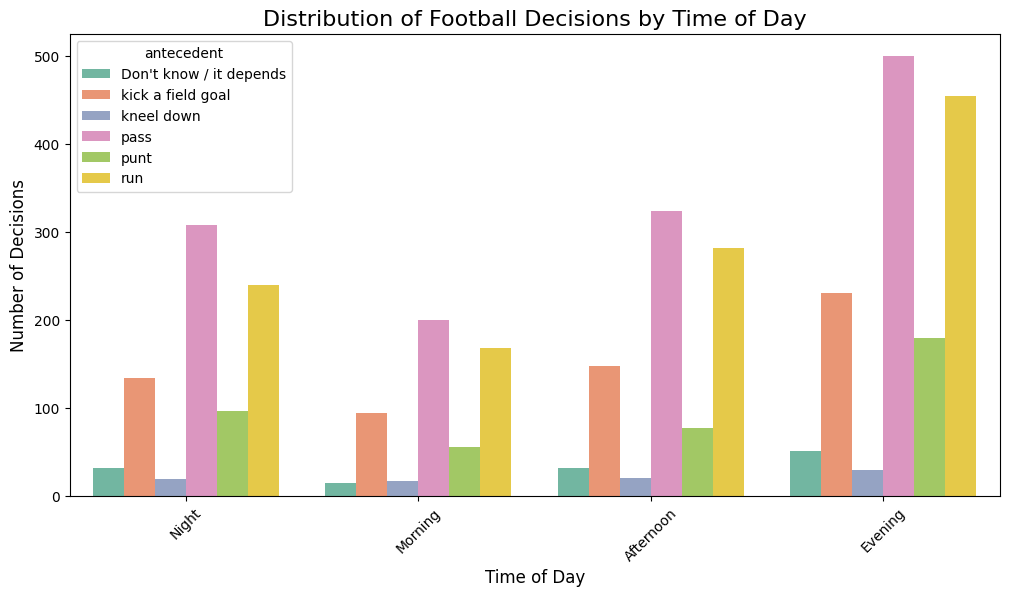

In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='time_of_day', y='count', hue='antecedent', data=decision_distribution_time_of_day, palette='Set2')

# Add labels and title
plt.title('Distribution of Football Decisions by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Decisions', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
